In [1]:
using Pkg
Pkg.add("DifferentialEquations")
Pkg.add("StaticArrays")
Pkg.add("Plots")
Pkg.add("PlotlyJS")
Pkg.add("PlotlyBase")
Pkg.add("PlotlyKaleido")
Pkg.add("Kaleido")  # 画像出力に使う（警告メッセージに出てたPlotlyKaleido）

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.toml`
  No Changes to `~/.julia/environments/v1.11/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.11/Project.to

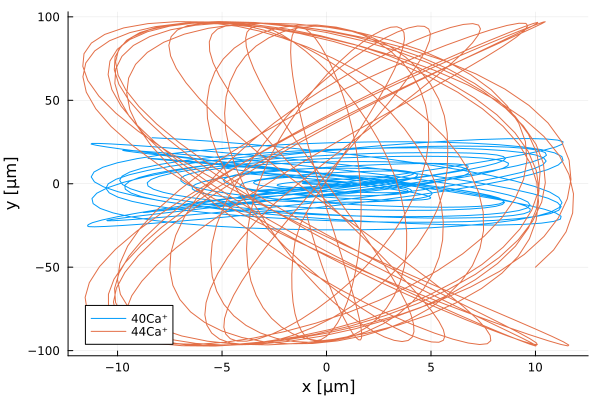

In [3]:
using DifferentialEquations
using StaticArrays
using Plots
using LinearAlgebra

# --- 定数 ---
const q = 1.602e-19        # 電荷 [C]
const ϵ0 = 8.854e-12       # 真空誘電率
const amu = 1.66054e-27    # 原子質量単位 [kg]

# --- イオンのパラメータ ---
m1 = 40 * amu  # 40Ca+
m2 = 44 * amu  # 44Ca+

# トラップ周波数 [Hz]
ωx = 1.6e6
ωy = 1.2e6
ωz = 350e3

# --- 初期状態 ---
# 位置 [m]
r1_0 = SVector(0.0, 0.0, 0.0) .* 1e-6
r2_0 = SVector(10.0, -50.0, 10.0) .* 1e-6

# 速度 [m/s]
v1_0 = SVector(0.0, 0.0, 0.0)
v2_0 = SVector(10.0, 100.0, 10.0)

# --- 微分方程式定義 ---
function twoion_dynamics!(du, u, p, t)
    r1 = SVector{3, Float64}(u[1], u[2], u[3])
    v1 = SVector{3, Float64}(u[4], u[5], u[6])
    r2 = SVector{3, Float64}(u[7], u[8], u[9])
    v2 = SVector{3, Float64}(u[10], u[11], u[12])

    # 調和ポテンシャルの力
    Ftrap1 = -m1 * SVector(ωx^2 * r1[1], ωy^2 * r1[2], ωz^2 * r1[3])
    Ftrap2 = -m2 * SVector(ωx^2 * r2[1], ωy^2 * r2[2], ωz^2 * r2[3])

    # クーロン反発
    r12 = r1 - r2
    d = norm(r12)
    Fcoul = (q^2) / (4π * ϵ0 * d^3) * r12

    # 運動方程式
    a1 = (Ftrap1 + Fcoul) / m1
    a2 = (Ftrap2 - Fcoul) / m2

    # 状態の時間変化
    du[1:3] .= v1
    du[4:6] .= a1
    du[7:9] .= v2
    du[10:12] .= a2
end

# 初期状態ベクトル
u0 = Float64[r1_0..., v1_0..., r2_0..., v2_0...]

# 時間設定
tspan = (0.0, 1e-4)  # 0 ~ 100 µs

# 問題定義と解く
prob = ODEProblem(twoion_dynamics!, u0, tspan)
sol = solve(prob, Tsit5(), saveat=1e-7)  # 0.1 µs ごとに保存

# --- プロット ---
x1 = [sol[i][1] * 1e6 for i in 1:length(sol.t)]  # µm
y1 = [sol[i][2] * 1e6 for i in 1:length(sol.t)]
x2 = [sol[i][7] * 1e6 for i in 1:length(sol.t)]
y2 = [sol[i][8] * 1e6 for i in 1:length(sol.t)]

plot(x1, y1, label="40Ca⁺", xlabel="x [µm]", ylabel="y [µm]")
plot!(x2, y2, label="44Ca⁺")


In [4]:
using Plots
plotly()  # インタラクティブ3D表示に切り替え

x1 = [sol[i][1] * 1e6 for i in 1:length(sol.t)]
y1 = [sol[i][2] * 1e6 for i in 1:length(sol.t)]
z1 = [sol[i][3] * 1e6 for i in 1:length(sol.t)]

x2 = [sol[i][7] * 1e6 for i in 1:length(sol.t)]
y2 = [sol[i][8] * 1e6 for i in 1:length(sol.t)]
z2 = [sol[i][9] * 1e6 for i in 1:length(sol.t)]

plot3d(x1, y1, z1, label="40Ca⁺", xlabel="x [μm]", ylabel="y [μm]", zlabel="z [μm]")
plot3d!(x2, y2, z2, label="44Ca⁺")


┌ Warning: Failed to load integration with PlotlyBase & PlotlyKaleido.
│   exception =
│    ArgumentError: Package PlotlyKaleido not found in current path.
│    - Run `import Pkg; Pkg.add("PlotlyKaleido")` to install the PlotlyKaleido package.
│    Stacktrace:
│      [1] macro expansion
│        @ ./loading.jl:2296 [inlined]
│      [2] macro expansion
│        @ ./lock.jl:273 [inlined]
│      [3] __require(into::Module, mod::Symbol)
│        @ Base ./loading.jl:2271
│      [4] #invoke_in_world#3
│        @ ./essentials.jl:1089 [inlined]
│      [5] invoke_in_world
│        @ ./essentials.jl:1086 [inlined]
│      [6] require(into::Module, mod::Symbol)
│        @ Base ./loading.jl:2260
│      [7] top-level scope
│        @ ~/.julia/packages/Plots/3u4B6/src/backends.jl:569
│      [8] eval
│        @ ./boot.jl:430 [inlined]
│      [9] _initialize_backend(pkg::Plots.PlotlyBackend)
│        @ Plots ~/.julia/packages/Plots/3u4B6/src/backends.jl:567
│     [10] backend(pkg::Plots.PlotlyBackend)


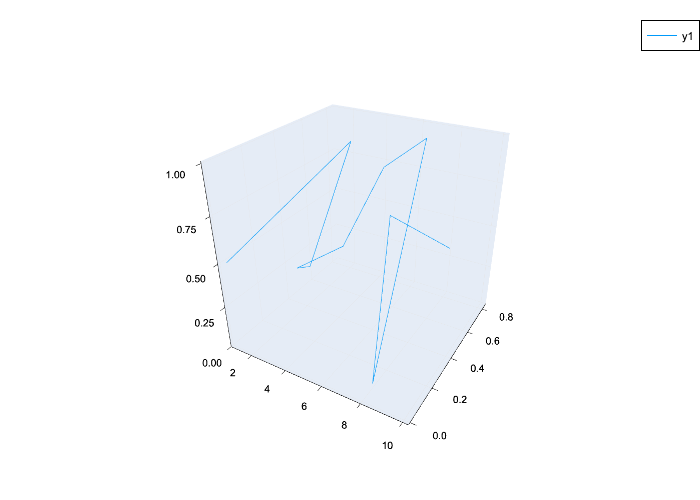

In [2]:
using Plots
plotly()
plt = plot3d(1:10, rand(10), rand(10))
display(plt)
